# Identificador de máscaras


# Introdução

Com a pandemia do coronavirus, uma das principais preocupações para o controle do crescimento do número de casos é o quanto a população está utilizando mascarás em locais públicos. Para isso, o objetivo desse trabalho é desenvolver um programa que, dado uma imagem, reconhece quantas pessoas estão na imagem, e quantas dessas estão com máscaras.

Para o reconhecimento de rostos, foi utilizada a biblioteca opencv-python, que usa visão computacional para detectar rostos. Depois, para reconhecer quais dos rostos estavam usando máscaras, calculamos os histogramas das partes da imagem com rostos. Para isso, identificamos se grande parte dos pixels tinham a mesma cor, e, se tivessem, indicam que há uma máscara.

# Métodos

O processo de identificação de faces 

In [1]:
#import sys
#!{sys.executable} -m pip install opencv-python
import cv2
import matplotlib.pyplot as plt
import numpy as np

from skimage import measure
from skimage.filters.rank import otsu
from skimage.filters import threshold_otsu, sobel
from skimage.morphology import disk



# Identificacao facial

In [2]:
cascPath = "haarcascade_frontalface_default.xml"

faceCascade = cv2.CascadeClassifier(cascPath)

NUM_IM = 16

figures = []
faces = []
gray=[]
for a in range(NUM_IM):
    fig_path = '../photos/' + str(a + 1) + '.png';
    image = cv2.imread(fig_path)
    gray.append(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))

    faces.append(faceCascade.detectMultiScale(
        gray[a],
        scaleFactor=1.3,
        minNeighbors=10,
        minSize=(20, 20),
        flags = cv2.CASCADE_SCALE_IMAGE
    ))

    print(f'{a+1}. Found {len(faces[a])} faces!')
    #for (x, y, w, h) in faces[a]:
        #img = np.array(gray)
        #img2 = img[y:y+h, x:x+w]
        #cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    #cv2.imshow("Faces found", image)

#imgs = cv2.hconcat((figures[0], figures[1]))
#cv2.imshow("Faces found", figures[1])
#cv2.waitKey(0)

1. Found 0 faces!
2. Found 1 faces!
3. Found 1 faces!
4. Found 1 faces!
5. Found 1 faces!
6. Found 2 faces!
7. Found 2 faces!
8. Found 0 faces!
9. Found 0 faces!
10. Found 1 faces!
11. Found 1 faces!
12. Found 2 faces!
13. Found 0 faces!
14. Found 0 faces!
15. Found 0 faces!
16. Found 0 faces!


In [21]:
print(faces[5])

[[ 90 119  99  99]
 [329 141  96  96]]


In [10]:
fig_path = '../photos/' + str(6) + '.png';
image = cv2.imread(fig_path)
for (x, y, w, h) in faces[5]:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
cv2.imshow("Faces found", image)
cv2.waitKey(0)

100

In [5]:
img = gray[3]
a = img[faces[3][0][1]:faces[3][0][1]+faces[3][0][3], faces[3][0][0]:faces[3][0][0]+faces[3][0][2]]
p = np.count_nonzero(a > 200)*100/a.size
print(p)

44.16502301117686


# Imagens para Treinamento de modelo
Utilizaram-se as imagens 2 e 3 para determinar como treinar o modelo

In [37]:
img = gray[1]
com_mascara = img[faces[1][0][1]:faces[1][0][1]+faces[1][0][3], faces[1][0][0]:faces[1][0][0]+faces[1][0][2]]

img = gray[2]
sem_mascara = img[faces[2][0][1]:faces[2][0][1]+faces[2][0][3], faces[2][0][0]:faces[2][0][0]+faces[2][0][2]]

In [38]:
nbins=256
GrhCM, bin_edgesCM = np.histogram(com_mascara, nbins, (0,256))
bin_edgesCM = np.delete(bin_edgesCM, 256)

GrhSM, bin_edgesSM = np.histogram(sem_mascara, nbins, (0,256))
bin_edgesSM = np.delete(bin_edgesSM, 256)

Text(0.5, 1.0, 'Histograma de Grayscale')

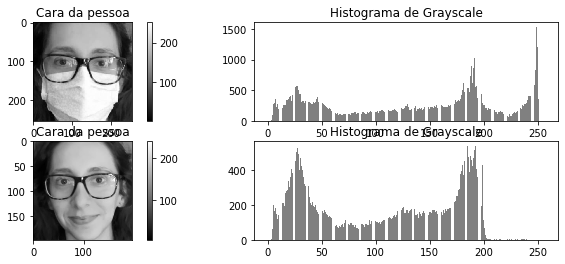

In [39]:
#plt.imshow(img2,cmap='gray')

plt.subplots(2,2, figsize = (12,4))

plt.subplot(221)
plt.title("Cara da pessoa")
plt.imshow(com_mascara, cmap = 'gray')

plt.subplot(222)
plt.bar(bin_edgesCM, GrhCM, align = 'edge', color = 'gray')
plt.title('Histograma de Grayscale')

plt.subplot(223)
plt.title("Cara da pessoa")
plt.imshow(sem_mascara, cmap = 'gray')

plt.subplot(224)
plt.bar(bin_edgesSM, GrhSM, align = 'edge', color = 'gray')
plt.title('Histograma de Grayscale')


Percebe-se que um bom limiar a ser testado é para uma intensidade de pixel igual a 200

In [35]:
mascara = np.count_nonzero(com_mascara > 200)*100/com_mascara.size
semmascara = np.count_nonzero(sem_mascara > 200)*100/sem_mascara.size

print(f'A porcentagem de pixels com valor maior que 200 para a foto com mascara foi: {mascara:.3f}%')
print(f'A porcentagem de pixels com valor maior que 200 para a foto sem mascara foi: {semmascara:.3f}%')

A porcentagem de pixels com valor maior que 200 para a foto com mascara foi: 20.587%
A porcentagem de pixels com valor maior que 200 para a foto sem mascara foi: 0.278%


Concluimos então que pelo menos 15% da cara da pessoa deve ser ocupada por uma mascara, para que ela seja considerada de mascara

# Teste do Modelo

In [36]:
caras =[]
for i in range(NUM_IM):
    for (x, y, w, h) in faces[i]:
        caras.append(gray[i][y:y+h, x:x+w])

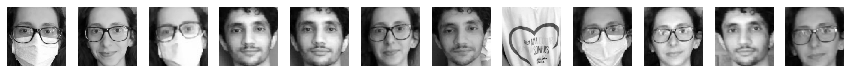

In [37]:
plt.subplots(1, 12, figsize = (15,6))

for i in range(len(caras)):
    plt.subplot(1, 12, 1+i)
    plt.axis('off')
    plt.imshow(caras[i], cmap = 'gray')

In [38]:
for i in range(len(caras)):
    if (np.count_nonzero(caras[i] > 200)*100/caras[i].size > 15):
        string = "com mascara"
    else:
        string = "sem mascara"
    print(f'{i+1}. {string}')

1. com mascara
2. sem mascara
3. com mascara
4. sem mascara
5. sem mascara
6. sem mascara
7. sem mascara
8. com mascara
9. com mascara
10. sem mascara
11. sem mascara
12. sem mascara


# Limitações

# Resultados

# Bibliografia

